# Introduction
Objective: help Wolt's marketing team to reactivate different kinds of users using a customer segmentation.

Dataset: User data from September 2020 to October 2021.

Plan
1. Data preparation (coding. if you are more business-oriented - just go to p.2)
2. RecencyFrequencyMonetary (RFM) segmentation and recommendations
3. Interesting anomaly findings

In [55]:
# libraries to process the data
import pandas as pd
from ast import literal_eval
# to visualise
import matplotlib.pyplot as plt
!pip install seaborn --quiet
import seaborn as sns

# 1. Data preparation

## 1.1. Import

In [4]:
# # upload input file in google collab (IF RUNNING IN THERE)
# from google.colab import files
# uploaded = files.upload()
# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [5]:
df_data = pd.read_csv('DS Assignment_Dataset.csv')

In [6]:
# Initial info about data
df_data.info()
df_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11948 non-null  object 
 6   LAST_PURCHASE_DAY                        12009 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2020-09-01 00:00:00,SWE,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2020-09-01 00:00:00,NOR,1,1.0,0.0,2021-09-02 00:00:00,2021-09-02 00:00:00,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2020-09-01 00:00:00,SWE,19,19.0,0.0,2020-12-10 00:00:00,2021-05-25 00:00:00,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2020-09-01 00:00:00,NOR,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2020-09-01 00:00:00,GEO,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


Looks like we have some aggregated data per user. Not transactional.
We have column 'USER_ID' -> let's check if all IDs are unique to be sure.

In [7]:
# must have 0 duplicated user IDs (all users must have unique IDs)
df_data['USER_ID'].nunique(dropna = True) - len(df_data)

0

Yes. It also follows from this that there are no duplicates of rows.

## 1.2. Data convertion, unpacking ('object' dtypes)

Lets go through "object" data types for possible conversions. Different usable yet locked data may be there, waiting for us!

In [8]:
df_data.loc[0:5, df_data.dtypes=='object']

,REGISTRATION_DATE,REGISTRATION_COUNTRY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,PREFERRED_DEVICE,PREFERRED_RESTAURANT_TYPES,PURCHASE_COUNT_BY_STORE_TYPE
0,2020-09-01 00:00:00,SWE,NaN,NaN,ios,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2020-09-01 00:00:00,NOR,2021-09-02 00:00:00,2021-09-02 00:00:00,android,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2020-09-01 00:00:00,SWE,2020-12-10 00:00:00,2021-05-25 00:00:00,android,NaN,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2020-09-01 00:00:00,NOR,NaN,NaN,android,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2020-09-01 00:00:00,GEO,NaN,NaN,android,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
5,2020-09-01 00:00:00,NOR,NaN,NaN,android,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


Datetime columns arrived as strings -> convert them

In [9]:
# string to datetime
df_data['REGISTRATION_DATE'] = pd.to_datetime(df_data['REGISTRATION_DATE'], format='%Y-%m-%d %H:%M:%S')
df_data['FIRST_PURCHASE_DAY'] = pd.to_datetime(df_data['FIRST_PURCHASE_DAY'], format='%Y-%m-%d %H:%M:%S')
df_data['LAST_PURCHASE_DAY'] = pd.to_datetime(df_data['LAST_PURCHASE_DAY'], format='%Y-%m-%d %H:%M:%S')

Let's unpack 'PURCHASE_COUNT_BY_STORE_TYPE'

In [10]:
print(df_data['PURCHASE_COUNT_BY_STORE_TYPE'].drop_duplicates()[0:5])
print(df_data['PURCHASE_COUNT_BY_STORE_TYPE'].drop_duplicates()[0])

0     {\n  "General merchandise": 0,\n  "Grocery": 0...
1     {\n  "General merchandise": 0,\n  "Grocery": 0...
2     {\n  "General merchandise": 1,\n  "Grocery": 9...
13    {\n  "General merchandise": 0,\n  "Grocery": 0...
16    {\n  "General merchandise": 1,\n  "Grocery": 3...
Name: PURCHASE_COUNT_BY_STORE_TYPE, dtype: object
{
  "General merchandise": 0,
  "Grocery": 0,
  "Pet supplies": 0,
  "Restaurant": 0,
  "Retail store": 0
}


In [11]:
# lets unpack it to unlock it for usage as separate columns

# unpack stacked data as new columns in separate Series
store_type_purchasings = df_data['PURCHASE_COUNT_BY_STORE_TYPE'].apply(literal_eval).apply(pd.Series)

# get extracted namings of columns
raw_columns_names = store_type_purchasings.columns
# make new namings: add prefix, fill spaces with underlines
new_column_names = \
  list(map(lambda x:('PURCHASED_IN_'+x).replace(' ','_'),
           raw_columns_names))

# rename new columns
store_type_purchasings = store_type_purchasings.rename(columns = dict(zip(raw_columns_names, new_column_names)))

# concatenate new columns to initial dataframe
df_data = pd.concat([df_data, store_type_purchasings], axis=1)

In [12]:
# lets have a look
df_data.loc[0:10, df_data.columns.str.match('^PURCHASED_IN_')].head()

,PURCHASED_IN_General_merchandise,PURCHASED_IN_Grocery,PURCHASED_IN_Pet_supplies,PURCHASED_IN_Restaurant,PURCHASED_IN_Retail_store
0,0,0,0,0,0
1,0,0,0,1,0
2,1,9,0,9,0
3,0,0,0,0,0
4,0,0,0,0,0


Great. Now 'PREFERRED_RESTAURANT_TYPES'

In [13]:
# initial observance
df_data['PREFERRED_RESTAURANT_TYPES'].drop_duplicates()

0                                                      NaN
13                                      [\n  "american"\n]
17                                      [\n  "japanese"\n]
26                                       [\n  "italian"\n]
39                                [\n  "middle eastern"\n]
                               ...                        
21028    [\n  "italian",\n  "japanese",\n  "indian",\n ...
21090    [\n  "middle eastern",\n  "japanese",\n  "ital...
21154       [\n  "hawaiian",\n  "american",\n  "indian"\n]
21333    [\n  "american",\n  "italian",\n  "thai",\n  "...
21591    [\n  "italian",\n  "hawaiian",\n  "mexican",\n...
Name: PREFERRED_RESTAURANT_TYPES, Length: 248, dtype: object

In [14]:
# convert list represented as string to pure list, ommiting cases where nan
df_data.loc[~df_data['PREFERRED_RESTAURANT_TYPES'].isna(),'PREFERRED_RESTAURANT_TYPES'] = \
df_data.loc[~df_data['PREFERRED_RESTAURANT_TYPES'].isna(),'PREFERRED_RESTAURANT_TYPES'].apply(literal_eval)

In [15]:
# create column with strong predefined structure as dictionary with 0 initial countings for counting up
rest_types = set(df_data['PREFERRED_RESTAURANT_TYPES'].dropna().values.sum()) # sum of the lists = concatenated list
df_data.loc[:,'PREFERRED_RESTAURANT_TYPES_dict'] = [dict().fromkeys(rest_types, 0) for i in range(len(df_data))]
df_data['PREFERRED_RESTAURANT_TYPES_dict'].head()

0    {'nepalese': 0, 'chinese': 0, 'italian': 0, 'h...
1    {'nepalese': 0, 'chinese': 0, 'italian': 0, 'h...
2    {'nepalese': 0, 'chinese': 0, 'italian': 0, 'h...
3    {'nepalese': 0, 'chinese': 0, 'italian': 0, 'h...
4    {'nepalese': 0, 'chinese': 0, 'italian': 0, 'h...
Name: PREFERRED_RESTAURANT_TYPES_dict, dtype: object

In [16]:
# count up
def dict_cntup(d,l):
  for i in l:
    d[i]+=1
  return d
df_data.loc[~df_data['PREFERRED_RESTAURANT_TYPES'].isna(), ['PREFERRED_RESTAURANT_TYPES_dict']] = \
df_data.loc[~df_data['PREFERRED_RESTAURANT_TYPES'].isna(), ['PREFERRED_RESTAURANT_TYPES_dict',
                                                            'PREFERRED_RESTAURANT_TYPES']
            ].apply(lambda rt_d_l: dict_cntup(rt_d_l[0],rt_d_l[1]), axis='columns')


# same procedure here to transition from dictionary column to unpacked

# unpack stacked data as new columns in separate Series
preferred_rest_types = df_data['PREFERRED_RESTAURANT_TYPES_dict'].apply(pd.Series)

# get extracted namings of columns
raw_columns_names = preferred_rest_types.columns
# make new namings: add prefix, fill spaces with underlines
new_column_names = \
  list(map(lambda x:('PREFERRED_RESTAURANT_TYPE_'+x).replace(' ','_'),
           raw_columns_names))

# rename new columns
preferred_rest_types = preferred_rest_types.rename(columns = dict(zip(raw_columns_names, new_column_names)))

# concatenate new columns to initial dataframe
df_data = pd.concat([df_data, preferred_rest_types], axis=1)

C:\Users\d.pesegov\AppData\Local\Temp\ipykernel_31748\3089239638.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ].apply(lambda rt_d_l: dict_cntup(rt_d_l[0],rt_d_l[1]), axis='columns')


In [17]:
# let's have a look on rows where preferred restaurants where not nans
df_data[~df_data['PREFERRED_RESTAURANT_TYPES'].isna()].loc[:, df_data.columns.str.match('^PREFERRED_RESTAURANT_TYPE_')].head()

,PREFERRED_RESTAURANT_TYPE_nepalese,PREFERRED_RESTAURANT_TYPE_chinese,PREFERRED_RESTAURANT_TYPE_italian,PREFERRED_RESTAURANT_TYPE_hawaiian,PREFERRED_RESTAURANT_TYPE_thai,PREFERRED_RESTAURANT_TYPE_greek,PREFERRED_RESTAURANT_TYPE_spanish,PREFERRED_RESTAURANT_TYPE_vietnamese,PREFERRED_RESTAURANT_TYPE_middle_eastern,PREFERRED_RESTAURANT_TYPE_japanese,PREFERRED_RESTAURANT_TYPE_korean,PREFERRED_RESTAURANT_TYPE_american,PREFERRED_RESTAURANT_TYPE_mexican,PREFERRED_RESTAURANT_TYPE_indian
13,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16,0,0,0,0,0,0,0,0,0,0,0,1,0,0
17,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26,0,0,1,0,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,0,1,0,0


PREFERRED_DEVICE and REGISTRATION_COUNTRY seems like 1 string per field (not stacked) but let's have a closer look

In [18]:
#  preferred device per user
print(df_data['PREFERRED_DEVICE'][~df_data['PREFERRED_DEVICE'].isna()].values)
print(set(df_data['PREFERRED_DEVICE'][~df_data['PREFERRED_DEVICE'].isna()].values))
print(len(set(df_data['PREFERRED_DEVICE'][~df_data['PREFERRED_DEVICE'].isna()].values)))

['ios' 'android' 'android' ... 'android' 'ios' 'web']
{'web', 'android', 'ios'}
3


Only 1 possible preferred device per user (1 string per user, not a list) - no need to unpack

In [19]:
#  registration country per user
print(df_data['REGISTRATION_COUNTRY'][~df_data['REGISTRATION_COUNTRY'].isna()].values)
print(set(df_data['REGISTRATION_COUNTRY'][~df_data['REGISTRATION_COUNTRY'].isna()].values))
print(len(set(df_data['REGISTRATION_COUNTRY'][~df_data['REGISTRATION_COUNTRY'].isna()].values)))

['SWE' 'NOR' 'SWE' ... 'SWE' 'SWE' 'GEO']
{'RUS', 'ISR', 'SVK', 'SVN', 'ROU', 'JOR', 'CHN', 'ITA', 'LBN', 'AZE', 'UKR', 'CHE', 'TWN', 'KOR', 'HKG', 'GRC', 'KWT', 'DEU', 'AUT', 'TUR', 'EST', 'COL', 'CYP', 'BEL', 'USA', 'IND', 'NLD', 'ESP', 'DNK', 'FRA', 'POL', 'MEX', 'FIN', 'GIN', 'QAT', 'BRA', 'ISL', 'NOR', 'HRV', 'PAK', 'ARE', 'HUN', 'LTU', 'SGP', 'CHL', 'GEO', 'LVA', 'MLT', 'SAU', 'PHL', 'CAN', 'JPN', 'SWE', 'PRT', 'IRL', 'AUS', 'FRO', 'CZE', 'GBR'}
59


Wow, 59 countries in here. Looks impressive.
Same, no need to unpack.

We have unpacked all stacked data and done convertions

## 1.3. Dealing with empty data

We have some emptiness in data: this may or may not be normal. For example if we know that in some real-world cases we just cannot collect the data, then this is expected, data is undefined/unreachable. But if it's not expected -> advice is to check the data collection process.

Let's try to understand emptiness

In [20]:
# how much of data is undefined in count and in %
df_buf = df_data.isnull().agg(['sum',]).T.rename(columns={'sum':'empty'})
print(df_buf.join(df_buf.rename(columns={'empty':'of_all_rows_%'})/len(df_data.index)*100).loc[lambda x:x.iloc[:,0]>0,:])

                                         empty  of_all_rows_%
PURCHASE_COUNT_DELIVERY                   9955      45.284993
PURCHASE_COUNT_TAKEAWAY                   9955      45.284993
FIRST_PURCHASE_DAY                       10035      45.648911
LAST_PURCHASE_DAY                         9974      45.371423
BREAKFAST_PURCHASES                       9955      45.284993
LUNCH_PURCHASES                           9955      45.284993
EVENING_PURCHASES                         9955      45.284993
DINNER_PURCHASES                          9955      45.284993
LATE_NIGHT_PURCHASES                      9955      45.284993
TOTAL_PURCHASES_EUR                       9955      45.284993
DISTINCT_PURCHASE_VENUE_COUNT             9955      45.284993
MIN_PURCHASE_VALUE_EUR                    9955      45.284993
MAX_PURCHASE_VALUE_EUR                    9955      45.284993
AVG_PURCHASE_VALUE_EUR                    9955      45.284993
PREFERRED_DEVICE                            73       0.332075
IOS_PURC

Looks like purchase_count has at least 0's in it and we can notice that if it is 0 then probably we just do not write any default data (delivery is NaN, takeaway is NaN). Let's check it for PURCHASE_COUNT>0

In [21]:
df_buf = df_data[df_data['PURCHASE_COUNT']>0].isnull().agg(['sum',]).T.rename(columns={'sum':'empty'})
print(df_buf.join(df_buf.rename(columns={'empty':'of_all_rows_%'})/len(df_data.index)*100).loc[lambda x:x.iloc[:,0]>0,:])

                               empty  of_all_rows_%
FIRST_PURCHASE_DAY                80       0.363918
LAST_PURCHASE_DAY                 19       0.086430
PREFERRED_DEVICE                   1       0.004549
PREFERRED_RESTAURANT_TYPES      9362      42.587454
AVG_DAYS_BETWEEN_PURCHASES      4196      19.087477
MEDIAN_DAYS_BETWEEN_PURCHASES   4196      19.087477


**Yes, looks like most of the emptiness is caused by logic behind PURCHASE_COUNT=0. That is all cases when user registered, but didn't make any purchase.**

**But still with PURCHASE_COUNT>0 we have some NaN's in some fields for users:**

1. **FIRST_PURCHASE_DAY - very strange (we didn't write the date of first purchase made)**
2. **LAST_PURCHASE_DAY - very strange (we didn't write the date of any of purchase made)**
3. **PREFERRED_DEVICE - very strange (do we have purchasing customers without devices?)**
4. PREFERRED_RESTAURANT_TYPES - may be ok if user didn't try delivery from restaurants for example
5. AVG_DAYS_BETWEEN_PURCHASES - may be ok if no second purchase made
6. MEDIAN_DAYS_BETWEEN_PURCHASES - may be ok if no second purchase made

Lets have a look

In [22]:
# FIRST_PURCHASE_DAY is empty but user has made purchases ?
df_data[(df_data['PURCHASE_COUNT']>0) & (df_data['FIRST_PURCHASE_DAY'].isnull())].head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,PREFERRED_RESTAURANT_TYPE_thai,PREFERRED_RESTAURANT_TYPE_greek,PREFERRED_RESTAURANT_TYPE_spanish,PREFERRED_RESTAURANT_TYPE_vietnamese,PREFERRED_RESTAURANT_TYPE_middle_eastern,PREFERRED_RESTAURANT_TYPE_japanese,PREFERRED_RESTAURANT_TYPE_korean,PREFERRED_RESTAURANT_TYPE_american,PREFERRED_RESTAURANT_TYPE_mexican,PREFERRED_RESTAURANT_TYPE_indian
151,2020-09-01,SWE,3,3.0,0.0,NaT,2021-08-18,152,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
193,2020-09-01,NOR,1,1.0,0.0,NaT,2020-09-01,194,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
400,2020-09-01,SWE,3,3.0,0.0,NaT,2020-10-04,401,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
552,2020-09-01,SWE,3,3.0,0.0,NaT,2021-04-25,553,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
555,2020-09-01,NOR,2,2.0,0.0,NaT,2021-08-28,556,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
# LAST_PURCHASE_DAY is empty but user has made purchases ?
df_data[(df_data['PURCHASE_COUNT']>0) & (df_data['LAST_PURCHASE_DAY'].isnull())].head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,PREFERRED_RESTAURANT_TYPE_thai,PREFERRED_RESTAURANT_TYPE_greek,PREFERRED_RESTAURANT_TYPE_spanish,PREFERRED_RESTAURANT_TYPE_vietnamese,PREFERRED_RESTAURANT_TYPE_middle_eastern,PREFERRED_RESTAURANT_TYPE_japanese,PREFERRED_RESTAURANT_TYPE_korean,PREFERRED_RESTAURANT_TYPE_american,PREFERRED_RESTAURANT_TYPE_mexican,PREFERRED_RESTAURANT_TYPE_indian
79,2020-09-01,GEO,320,320.0,0.0,2020-09-01,NaT,80,37.0,171.0,...,0,0,0,0,0,0,0,0,0,0
4616,2020-09-07,NOR,1,1.0,0.0,NaT,NaT,4617,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5146,2020-09-07,NOR,6,6.0,0.0,2020-11-18,NaT,5147,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
6656,2020-09-09,SWE,5,4.0,1.0,2020-09-09,NaT,6657,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
7592,2020-09-11,NOR,2,2.0,0.0,2020-09-11,NaT,7593,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


USER_ID=80, made 320 purchases once in the date of registration and then gone and we have undefined date in "LAST_PURCHASE_DAY".

Short conclusion.
Data is not perfect, but neither is the real world in which we are trying to collect it.

In [24]:
# drop old columns from which we unpacked data
df_data = df_data.drop(columns=['PREFERRED_RESTAURANT_TYPES'])
df_data = df_data.drop(columns=['PREFERRED_RESTAURANT_TYPES_dict'])
df_data = df_data.drop(columns=['PURCHASE_COUNT_BY_STORE_TYPE'])

As we have seen, there may be some anomalies in the data, presumably as a consequence of the data collection process itself.

## 1.4. Preparations for RFM

For RFM analysis we will need to focus on:

Recency : Last activity date - for this we will take first non-nat value in descending order from LAST_PURCHASE_DAY <- FIRST_PURCHASE_DAY <- REGISTRATION_DATE

Frequency : PURCHASE_COUNT - we are safe (no empty data)

Monetary : TOTAL_PURCHASES_EUR - empty if no purchases, fill with 0

Let's make new columns RFM_R, RFM_F, RFM_M, RFM_score

In [25]:
# Creating the LAST_ACTIVITY_DATE column
df_data['LAST_ACTIVITY_DATE'] = (df_data['LAST_PURCHASE_DAY']
                                   .combine_first(df_data['FIRST_PURCHASE_DAY'])
                                   .combine_first(df_data['REGISTRATION_DATE']))

In [26]:
# Fill empty TOTAL_PURCHASES_EUR with 0
df_data.loc[df_data['TOTAL_PURCHASES_EUR'].isna(), ['TOTAL_PURCHASES_EUR']] = 0

In [27]:
# Calculating R, F, M
df_data['RFM_R'] = pd.qcut(((df_data['LAST_ACTIVITY_DATE'].max() - df_data['LAST_ACTIVITY_DATE']).dt.days).rank(method='first'), 3, labels=[3, 2, 1])
df_data['RFM_F'] = pd.qcut(df_data['PURCHASE_COUNT'].rank(method='first'), 3, labels=[1, 2, 3])
df_data['RFM_M'] = pd.qcut(df_data['TOTAL_PURCHASES_EUR'].rank(method='first'), 3, labels=[1, 2, 3])

In [28]:
# Combine to one RFM score
df_data['RFM_score'] = df_data['RFM_R'].astype(str) + df_data['RFM_F'].astype(str) + df_data['RFM_M'].astype(str)

In [29]:
# Define function to assign segments and provide descriptions and marketing strategies
def segment_users(row):
    rfm_dict = {
        '333': 'Best Customers',       '332': 'Loyal Customers',       '331': 'Big Spenders',
        '323': 'Almost Lost',          '322': 'Loyal Frequent',        '321': 'Frequent Spenders',
        '313': 'High Potential',       '312': 'Potential Loyalists',   '311': 'Potential Spenders',
        '233': 'New Customers',        '232': 'Returning Customers',   '231': 'Promising Customers',
        '223': 'At Risk',              '222': 'Loyal At Risk',         '221': 'At Risk Spenders',
        '213': 'New Spenders',         '212': 'Spenders',              '211': 'New Potential',
        '133': 'Hibernating',          '132': 'Lost Loyalists',        '131': 'Lost Big Spenders',
        '123': 'About to Sleep',       '122': 'At Risk of Losing',     '121': 'Lost Spenders',
        '113': 'Lost Customers',       '112': 'Lost Frequent',         '111': 'Lost Spenders'
    }
    return rfm_dict.get(row['RFM_score'], 'Other')

df_data['segment'] = df_data.apply(segment_users, axis=1)

# Check the segments
print(df_data['segment'].value_counts())

# Define marketing strategies
marketing_strategies = {
    'Best Customers': 'Offer exclusive discounts and early access to new products.',
    'Loyal Customers': 'Reward loyalty with a points-based rewards program.',
    'Big Spenders': 'Invite to VIP events and provide premium customer service.',
    'Almost Lost': 'Send re-engagement campaigns with personalized offers.',
    'Loyal Frequent': 'Send frequent purchase reminders and special deals.',
    'Frequent Spenders': 'Offer bulk purchase discounts and bundle deals.',
    'High Potential': 'Send targeted promotions to encourage more frequent purchases.',
    'Potential Loyalists': 'Introduce loyalty programs and personalized recommendations.',
    'Potential Spenders': 'Highlight high-value products and offer limited-time discounts.',
    'New Customers': 'Welcome them with a special discount on the next purchase.',
    'Returning Customers': 'Acknowledge their return with personalized messages.',
    'Promising Customers': 'Offer incentives for frequent visits and higher spending.',
    'At Risk': 'Send win-back campaigns with attractive offers.',
    'Loyal At Risk': 'Remind them of the benefits of staying loyal.',
    'At Risk Spenders': 'Offer special deals to encourage spending.',
    'New Spenders': 'Encourage further spending with introductory offers.',
    'Spenders': 'Promote exclusive products and services.',
    'New Potential': 'Engage with personalized messages to understand their needs.',
    'Hibernating': 'Send reactivation emails with exclusive offers.',
    'Lost Loyalists': 'Remind them of their past loyalty and offer re-engagement incentives.',
    'Lost Big Spenders': 'Offer substantial discounts to regain their interest.',
    'About to Sleep': 'Send last-chance offers to re-engage them.',
    'At Risk of Losing': 'Highlight new arrivals and special discounts.',
    'Lost Spenders': 'Attempt to win back with aggressive discounting.',
    'Lost Customers': 'Re-engage with surveys to understand why they left.',
    'Lost Frequent': 'Send personalized re-engagement campaigns.',
}

segment
Lost Spenders          5757
Best Customers         5503
Loyal At Risk          4165
New Potential          1571
At Risk of Losing      1276
Loyal Frequent         1067
New Customers           961
Loyal Customers         483
Returning Customers     320
At Risk                 310
Almost Lost             275
About to Sleep          234
Hibernating              45
Lost Loyalists           16
Name: count, dtype: int64


In [45]:
# routines for output metrics

def describe_rfm_segment(R, F, M, df_data, marketing_strategies):
    # Filter the dataframe based on R, F, M scores
    segment_df = df_data[(df_data['RFM_R'] == R) & (df_data['RFM_F'] == F) & (df_data['RFM_M'] == M)]

    # Calculate the required metrics
    total_users = df_data['USER_ID'].nunique()
    segment_users = segment_df['USER_ID'].nunique()

    # Determine recommended strategy based on segment
    recommended_strategy = marketing_strategies.get(segment_df['segment'].iloc[0], 'Unknown')

    # 1. Percentage of users in this segment
    percent_users_in_segment = (segment_users / total_users) * 100

    # 2. Top 5 countries and their distribution
    top_countries = segment_df['REGISTRATION_COUNTRY'].value_counts(normalize=True).head(5) * 100

    # 3. Average days since users have been active in this segment
    avg_days_since_active = (pd.to_datetime('2021-10-31') - pd.to_datetime(segment_df['LAST_ACTIVITY_DATE'])).dt.days.mean()

    # 4. Average number of purchases in this segment
    avg_purchase_count = segment_df['PURCHASE_COUNT'].mean()

    # 5. Average spending in this segment
    avg_spending = segment_df['TOTAL_PURCHASES_EUR'].mean()

    # 6. Distribution between Delivery and Takeaway
    if segment_df[['PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY']].sum().sum() == 0:
        delivery_takeaway_distribution = 'Unknown'
    else:
        delivery_takeaway_distribution = {
            'Delivery': segment_df['PURCHASE_COUNT_DELIVERY'].sum() / segment_df['PURCHASE_COUNT'].sum() * 100,
            'Takeaway': segment_df['PURCHASE_COUNT_TAKEAWAY'].sum() / segment_df['PURCHASE_COUNT'].sum() * 100
        }

    # 7. Distribution between meal times
    meal_fields = ['BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES', 'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES']
    if segment_df[meal_fields].sum().sum() == 0:
        meal_time_distribution = 'Unknown'
    else:
        meal_time_distribution = (segment_df[meal_fields].sum() / segment_df[meal_fields].sum().sum() * 100).to_dict()

    # 8. Distribution between platforms
    platform_fields = ['IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES']
    if segment_df[platform_fields].sum().sum() == 0:
        platform_distribution = 'Unknown'
    else:
        platform_distribution = (segment_df[platform_fields].sum() / segment_df[platform_fields].sum().sum() * 100).to_dict()

    # 9. Distribution of users with valid payment method
    if segment_df['USER_HAS_VALID_PAYMENT_METHOD'].isnull().all():
        payment_method_distribution = 'Unknown'
    else:
        payment_method_distribution = (segment_df['USER_HAS_VALID_PAYMENT_METHOD'].value_counts(normalize=True) * 100).to_dict()

    # 10. Top 3 hours of the day and their distribution
    if segment_df['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'].isnull().all():
        top_hours_distribution = 'Unknown'
    else:
        top_hours_distribution = (segment_df['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'].value_counts(normalize=True).head(3) * 100).to_dict()

    # 11. Top 3 weekdays and their distribution
    if segment_df['MOST_COMMON_WEEKDAY_TO_PURCHASE'].isnull().all():
        top_weekdays_distribution = 'Unknown'
    else:
        top_weekdays_distribution = (segment_df['MOST_COMMON_WEEKDAY_TO_PURCHASE'].value_counts(normalize=True).head(3) * 100).to_dict()

    # 12. Average days between purchases
    avg_days_between_purchases = segment_df['AVG_DAYS_BETWEEN_PURCHASES'].mean()

    # 13. Average delivery distance
    avg_delivery_distance = segment_df['AVERAGE_DELIVERY_DISTANCE_KMS'].mean()

    # 14. Distribution between types of stores
    store_fields = ['PURCHASED_IN_General_merchandise', 'PURCHASED_IN_Grocery', 'PURCHASED_IN_Pet_supplies', 'PURCHASED_IN_Restaurant', 'PURCHASED_IN_Retail_store']
    if segment_df[store_fields].sum().sum() == 0:
        store_type_distribution = 'Unknown'
    else:
        store_type_distribution = (segment_df[store_fields].sum() / segment_df[store_fields].sum().sum() * 100).to_dict()

    # 15. Distribution between preferred restaurants
    restaurant_fields = ['PREFERRED_RESTAURANT_TYPE_vietnamese', 'PREFERRED_RESTAURANT_TYPE_korean', 'PREFERRED_RESTAURANT_TYPE_japanese',
                         'PREFERRED_RESTAURANT_TYPE_middle_eastern', 'PREFERRED_RESTAURANT_TYPE_nepalese', 'PREFERRED_RESTAURANT_TYPE_hawaiian',
                         'PREFERRED_RESTAURANT_TYPE_thai', 'PREFERRED_RESTAURANT_TYPE_chinese', 'PREFERRED_RESTAURANT_TYPE_mexican',
                         'PREFERRED_RESTAURANT_TYPE_greek', 'PREFERRED_RESTAURANT_TYPE_italian', 'PREFERRED_RESTAURANT_TYPE_american',
                         'PREFERRED_RESTAURANT_TYPE_indian', 'PREFERRED_RESTAURANT_TYPE_spanish']
    if segment_df[restaurant_fields].sum().sum() == 0:
        restaurant_type_distribution = 'Unknown'
    else:
        restaurant_type_distribution = (segment_df[restaurant_fields].sum() / segment_df[restaurant_fields].sum().sum() * 100).to_dict()

    # Compile the results into a dictionary
    segment_description = {
        'recommended_strategy': recommended_strategy,
        'percent_users_in_segment': percent_users_in_segment,
        'top_countries_distribution': top_countries.to_dict(),
        'avg_days_since_active': avg_days_since_active,
        'avg_purchase_count': avg_purchase_count,
        'avg_spending': avg_spending,
        'delivery_takeaway_distribution': delivery_takeaway_distribution,
        'meal_time_distribution': meal_time_distribution,
        'platform_distribution': platform_distribution,
        'payment_method_distribution': payment_method_distribution,
        'top_hours_distribution': top_hours_distribution,
        'top_weekdays_distribution': top_weekdays_distribution,
        'avg_days_between_purchases': avg_days_between_purchases,
        'avg_delivery_distance': avg_delivery_distance,
        'store_type_distribution': store_type_distribution,
        'restaurant_type_distribution': restaurant_type_distribution
    }

    return segment_description

def print_segment_description(segment_description):
    print("Recommended Strategy: ", segment_description['recommended_strategy'])
    print("\nSegment Description:")

    for key, value in segment_description.items():
        if key == 'recommended_strategy':
            continue

        print(f"{key.replace('_', ' ').title()}:")

        if isinstance(value, dict):
            for k, v in value.items():
                if isinstance(v, (int, float)):
                    if 'percent' in key.lower() or 'distribution' in key.lower():
                        print(f"  - {k}: {v:.2f}%")
                    else:
                        print(f"  - {k}: {v:.2f}")
                else:
                    print(f"  - {k}: {v}")

        elif isinstance(value, pd.Series):
            for idx, val in value.items():
                if isinstance(val, (int, float)):
                    if 'percent' in key.lower() or 'distribution' in key.lower():
                        print(f"  - {idx}: {val:.2f}%")
                    else:
                        print(f"  - {idx}: {val:.2f}")
                else:
                    print(f"  - {idx}: {val}")

        elif isinstance(value, (int, float)):
            if 'percent' in key.lower() or 'distribution' in key.lower():
                print(f"  - {value:.2f}%")
            else:
                print(f"  - {value:.2f}")

        else:
            print(f"  - {value}")

def plot_rfm_distributions(R, F, M, df_data):
    # Set up the overall style for the plots
    sns.set(style="darkgrid", palette="bright")

    # Filter the dataframe based on R, F, M scores
    segment_df = df_data[(df_data['RFM_R'] == R) & (df_data['RFM_F'] == F) & (df_data['RFM_M'] == M)].copy()

    # Define the metrics to plot
    metrics = {
        'Days Since Active': 'LAST_ACTIVITY_DATE',
        'Purchase Count': 'PURCHASE_COUNT',
        'Spending': 'TOTAL_PURCHASES_EUR',
        'Days Between Purchases': 'AVG_DAYS_BETWEEN_PURCHASES',
        'Delivery Distance': 'AVERAGE_DELIVERY_DISTANCE_KMS'
    }

    # Convert the LAST_ACTIVITY_DATE to the number of days since last active
    if 'LAST_ACTIVITY_DATE' in segment_df.columns:
        segment_df['LAST_ACTIVITY_DATE'] = (pd.to_datetime('2021-10-31') - pd.to_datetime(segment_df['LAST_ACTIVITY_DATE'])).dt.days

    # Create a figure for the plots
    plt.figure(figsize=(15, 10))

    # Iterate over the metrics and create a kde plot for each
    for i, (metric_name, column) in enumerate(metrics.items(), 1):
        plt.subplot(3, 2, i)

        sns.kdeplot(segment_df[column], fill=True)
        plt.title(metric_name)
        plt.xlabel(metric_name.replace('_', ' '))
        plt.ylabel('Density')

        # Limit x-axis to start from zero
        plt.xlim(left=-0.9)

        # Place average, median, and mode values on the plot
        avg_value = segment_df[column].mean()
        median_value = segment_df[column].median()
        mode_value = segment_df[column].mode()[0]

        plt.axvline(x=avg_value, color='r', linestyle='--', label=f'Avg: {avg_value:.2f}')
        plt.axvline(x=median_value, color='g', linestyle='--', label=f'Median: {median_value:.2f}')
        plt.axvline(x=mode_value, color='b', linestyle='--', label=f'Mode: {mode_value:.2f}')
        plt.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


def plot_segment_description(segment_description):
    # Set up the overall style for the plots
    sns.set(style="darkgrid", palette="bright")

    # Create a figure to hold all subplots
    fig, axs = plt.subplots(5, 2, figsize=(15, 25))
    fig.suptitle('Segment Description Charts', fontsize=20)

    # Percent Users in Segment
    axs[0, 0].pie([segment_description['percent_users_in_segment'], 100 - segment_description['percent_users_in_segment']],
                  labels=['Segment Users', 'Other Users'],
                  autopct='%1.1f%%', startangle=140)
    axs[0, 0].set_title('Percent Users in Segment')

    # Top Countries Distribution
    if segment_description['top_countries_distribution'] != 'Unknown':
        top_countries = segment_description['top_countries_distribution']
        sns.barplot(x=list(top_countries.keys()), y=list(top_countries.values()), ax=axs[0, 1])
        axs[0, 1].set_title('Top Countries Distribution')
        axs[0, 1].set_ylabel('Percentage')
        for i, val in enumerate(top_countries.values()):
            axs[0, 1].text(i, val, f'{val:.2f}', ha='center', va='bottom', fontsize=10)

    # Delivery Takeaway Distribution
    if segment_description['delivery_takeaway_distribution'] != 'Unknown':
        delivery_takeaway = segment_description['delivery_takeaway_distribution']
        sns.barplot(x=list(delivery_takeaway.keys()), y=list(delivery_takeaway.values()), ax=axs[1, 0])
        axs[1, 0].set_title('Delivery vs Takeaway Distribution')
        axs[1, 0].set_ylabel('Percentage')
        for i, val in enumerate(delivery_takeaway.values()):
            axs[1, 0].text(i, val, f'{val:.2f}', ha='center', va='bottom', fontsize=10)

    # Meal Time Distribution
    if segment_description['meal_time_distribution'] != 'Unknown':
        meal_time = segment_description['meal_time_distribution']
        sns.barplot(x=[k.replace('_PURCHASES', '') for k in meal_time.keys()], y=list(meal_time.values()), ax=axs[1, 1])
        axs[1, 1].set_title('Meal Time Distribution')
        axs[1, 1].set_ylabel('Percentage')
        for i, val in enumerate(meal_time.values()):
            axs[1, 1].text(i, val, f'{val:.2f}', ha='center', va='bottom', fontsize=10)

    # Platform Distribution
    if segment_description['platform_distribution'] != 'Unknown':
        platform = segment_description['platform_distribution']
        sns.barplot(x=[k.replace('_PURCHASES', '') for k in platform.keys()], y=list(platform.values()), ax=axs[2, 0])
        axs[2, 0].set_title('Platform Distribution')
        axs[2, 0].set_ylabel('Percentage')
        for i, val in enumerate(platform.values()):
            axs[2, 0].text(i, val, f'{val:.2f}', ha='center', va='bottom', fontsize=10)

    # Payment Method Distribution
    if segment_description['payment_method_distribution'] != 'Unknown':
        payment_method = segment_description['payment_method_distribution']
        sns.barplot(x=list(payment_method.keys()), y=list(payment_method.values()), ax=axs[2, 1])
        axs[2, 1].set_title('Payment Method Distribution')
        axs[2, 1].set_ylabel('Percentage')
        for i, val in enumerate(payment_method.values()):
            axs[2, 1].text(i, val, f'{val:.2f}', ha='center', va='bottom', fontsize=10)

    # Top Hours Distribution
    if segment_description['top_hours_distribution'] != 'Unknown':
        top_hours = segment_description['top_hours_distribution']
        sns.barplot(x=list(top_hours.keys()), y=list(top_hours.values()), ax=axs[3, 0])
        axs[3, 0].set_title('Top Hours Distribution')
        axs[3, 0].set_ylabel('Percentage')
        for i, val in enumerate(top_hours.values()):
            axs[3, 0].text(i, val, f'{val:.2f}', ha='center', va='bottom', fontsize=10)

    # Top Weekdays Distribution
    if segment_description['top_weekdays_distribution'] != 'Unknown':
        top_weekdays = segment_description['top_weekdays_distribution']
        sns.barplot(x=list(top_weekdays.keys()), y=list(top_weekdays.values()), ax=axs[3, 1])
        axs[3, 1].set_title('Top Weekdays Distribution')
        axs[3, 1].set_ylabel('Percentage')
        for i, val in enumerate(top_weekdays.values()):
            axs[3, 1].text(i, val, f'{val:.2f}', ha='center', va='bottom', fontsize=10)

    # Store Type Distribution
    if segment_description['store_type_distribution'] != 'Unknown':
        store_type = segment_description['store_type_distribution']
        sns.barplot(x=[k.replace('PURCHASED_IN_', '') for k in store_type.keys()], y=list(store_type.values()), ax=axs[4, 0])
        axs[4, 0].set_title('Store Type Distribution')
        axs[4, 0].set_ylabel('Percentage')
        for i, val in enumerate(store_type.values()):
            axs[4, 0].text(i, val, f'{val:.2f}', ha='center', va='bottom', fontsize=10)

    # Restaurant Type Distribution
    if segment_description['restaurant_type_distribution'] != 'Unknown':
        restaurant_type = segment_description['restaurant_type_distribution']
        sns.barplot(x=[k.replace('PREFERRED_RESTAURANT_TYPE_', '') for k in restaurant_type.keys()], y=list(restaurant_type.values()), ax=axs[4, 1])
        axs[4, 1].set_title('Restaurant Type Distribution')
        axs[4, 1].set_ylabel('Percentage')
        plt.sca(axs[4, 1])
        plt.xticks(rotation=45)  # Rotate x-axis labels for restaurant type distribution
        for i, val in enumerate(restaurant_type.values()):
            axs[4, 1].text(i, val, f'{val:.2f}', ha='center', va='bottom', fontsize=10)

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# 2. RecencyFrequencyMonetary (RFM) segmentation and recommendations

For the convenience of the marketing team we will go with RFM (Recency, Frequency, Monetary) analysis. It is proven technique for customer segmentation.

Metrics are:

Recency (R): when was the last time the customer purchased?

Frequency (F): how often the customer purchases?

Monetary (M): how much the customer spent with us?


We made 3 bins for each of R, F, M.

That give us total of 3* 3* 3=27 segments.

Some segments are more critical to focus on than others, especially when the goal is to reactivate customers and maximize value.


Focus Segments

Best Customers (R3F3M3)

At Risk (R2F2M3)

Hibernating (R1F3M3)



### **Best Customers (R3F3M3)**

Description: These customers have the highest recency, frequency, and monetary scores.

Importance: They are your most valuable customers, contributing significantly to your revenue.

Recommendation: Maintain their loyalty by offering exclusive discounts, early access to new products, and VIP treatment.

In [46]:
rv,fv,mv = 3,3,3
segment_description = describe_rfm_segment(rv,fv,mv, df_data, marketing_strategies)
print_segment_description(segment_description)

Recommended Strategy:  Offer exclusive discounts and early access to new products.

Segment Description:
Percent Users In Segment:
  - 25.03%
Top Countries Distribution:
  - NOR: 46.52%
  - SWE: 43.85%
  - GEO: 9.09%
  - EST: 0.16%
  - FIN: 0.07%
Avg Days Since Active:
  - 66.35
Avg Purchase Count:
  - 11.11
Avg Spending:
  - 322.12
Delivery Takeaway Distribution:
  - Delivery: 93.94%
  - Takeaway: 6.06%
Meal Time Distribution:
  - BREAKFAST_PURCHASES: 3.14%
  - LUNCH_PURCHASES: 39.44%
  - EVENING_PURCHASES: 7.71%
  - DINNER_PURCHASES: 49.71%
  - LATE_NIGHT_PURCHASES: 0.00%
Platform Distribution:
  - IOS_PURCHASES: 47.88%
  - WEB_PURCHASES: 16.44%
  - ANDROID_PURCHASES: 35.68%
Payment Method Distribution:
  - True: 62.17%
  - False: 37.83%
Top Hours Distribution:
  - 18.0: 4.94%
  - 1.0: 4.43%
  - 12.0: 4.38%
Top Weekdays Distribution:
  - 7.0: 14.90%
  - 1.0: 14.66%
  - 4.0: 14.57%
Avg Days Between Purchases:
  - 62.93
Avg Delivery Distance:
  - 5.92
Store Type Distribution:
  - PURCH

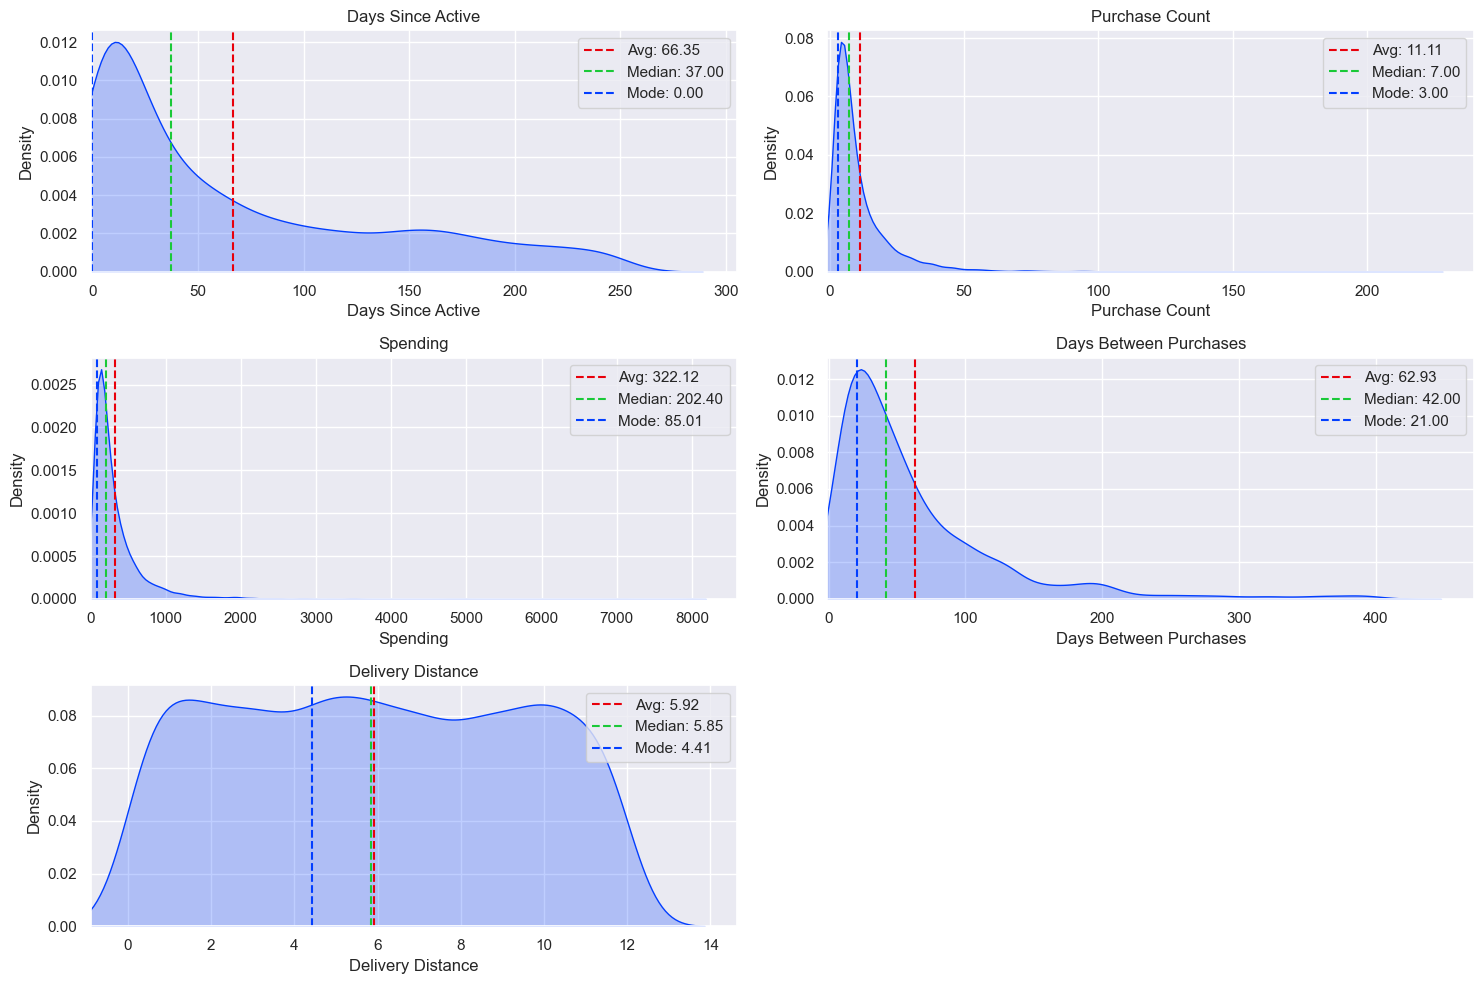

In [47]:
plot_rfm_distributions(rv,fv,mv, df_data)

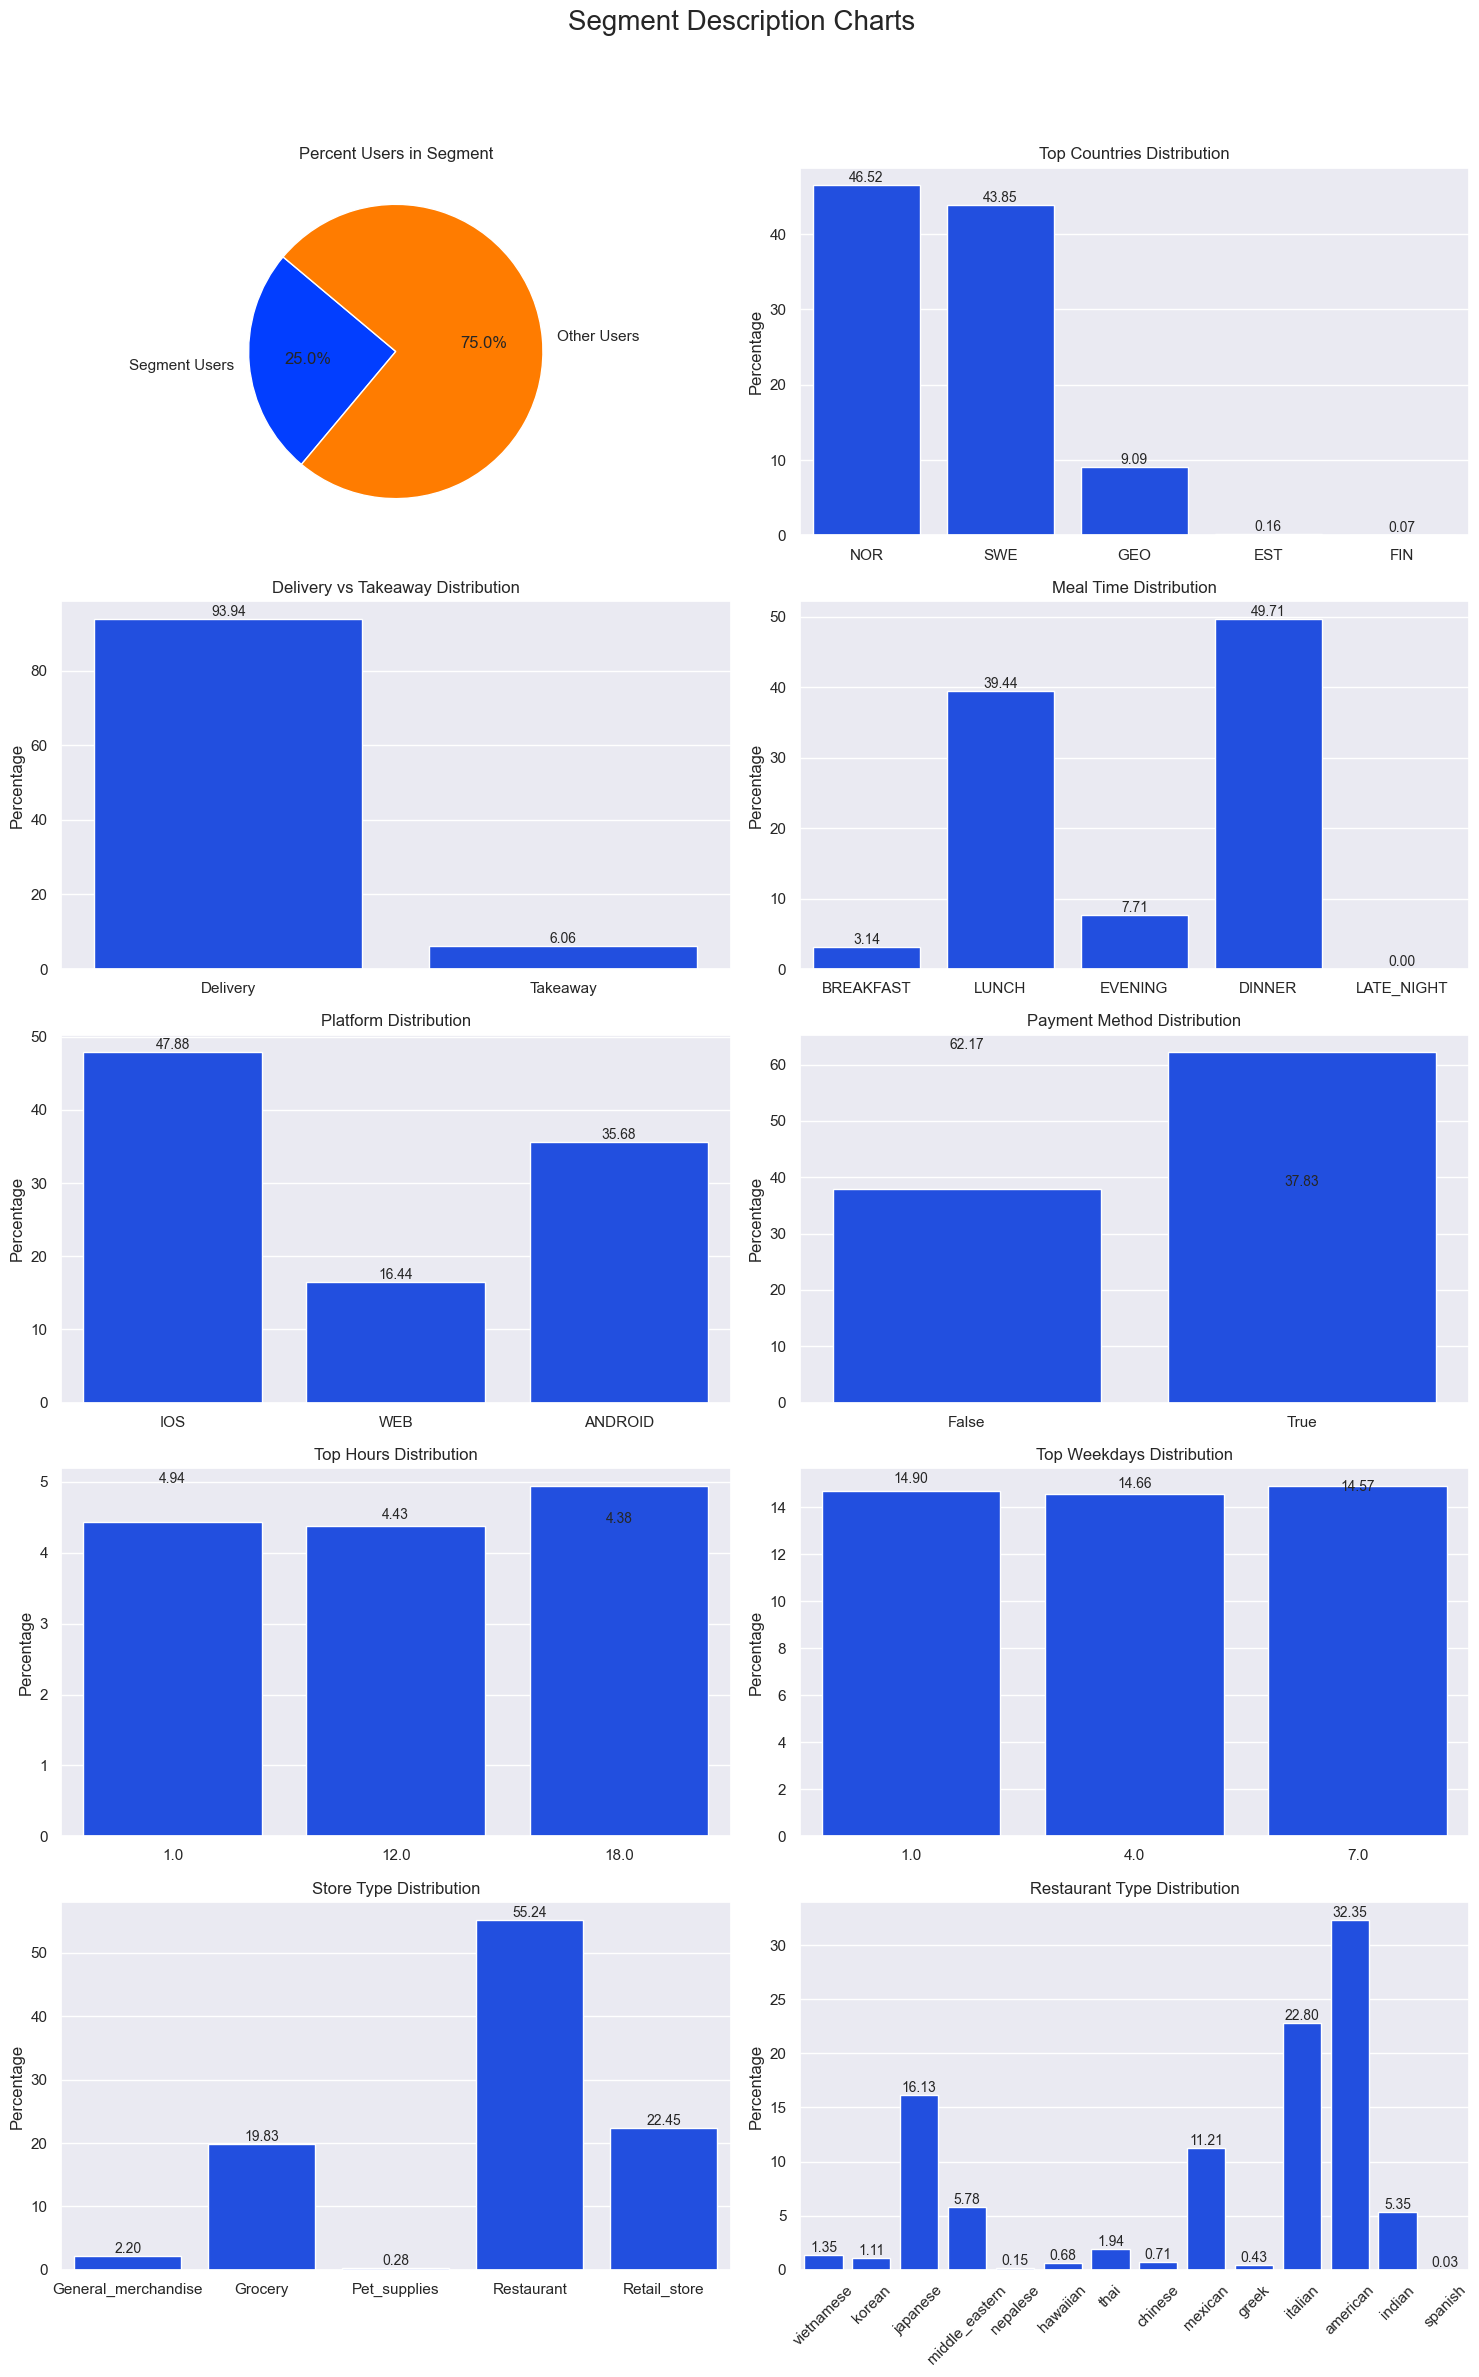

In [48]:
plot_segment_description(segment_description)

### **At Risk (R2F2M3)**

Description: Moderately recent buyers who spend significantly but have reduced their frequency.

Importance: These customers are valuable but need re-engagement to prevent them from churning.

Recommendation: Win-back campaigns with attractive offers, personalized messages, and highlighting new products.

In [49]:
rv,fv,mv = 2,2,3
segment_description = describe_rfm_segment(rv,fv,mv, df_data, marketing_strategies)
print_segment_description(segment_description)

Recommended Strategy:  Send win-back campaigns with attractive offers.

Segment Description:
Percent Users In Segment:
  - 1.41%
Top Countries Distribution:
  - SWE: 60.65%
  - NOR: 38.71%
  - GEO: 0.65%
Avg Days Since Active:
  - 370.12
Avg Purchase Count:
  - 1.30
Avg Spending:
  - 79.68
Delivery Takeaway Distribution:
  - Delivery: 93.80%
  - Takeaway: 6.20%
Meal Time Distribution:
  - BREAKFAST_PURCHASES: 4.24%
  - LUNCH_PURCHASES: 34.16%
  - EVENING_PURCHASES: 3.74%
  - DINNER_PURCHASES: 57.86%
  - LATE_NIGHT_PURCHASES: 0.00%
Platform Distribution:
  - IOS_PURCHASES: 41.94%
  - WEB_PURCHASES: 32.26%
  - ANDROID_PURCHASES: 25.81%
Payment Method Distribution:
  - True: 57.74%
  - False: 42.26%
Top Hours Distribution:
  - 0.0: 6.77%
  - 8.0: 6.13%
  - 23.0: 5.81%
Top Weekdays Distribution:
  - 2.0: 18.06%
  - 6.0: 15.48%
  - 5.0: 14.52%
Avg Days Between Purchases:
  - 62.22
Avg Delivery Distance:
  - 6.36
Store Type Distribution:
  - PURCHASED_IN_General_merchandise: 0.00%
  - PURCHA

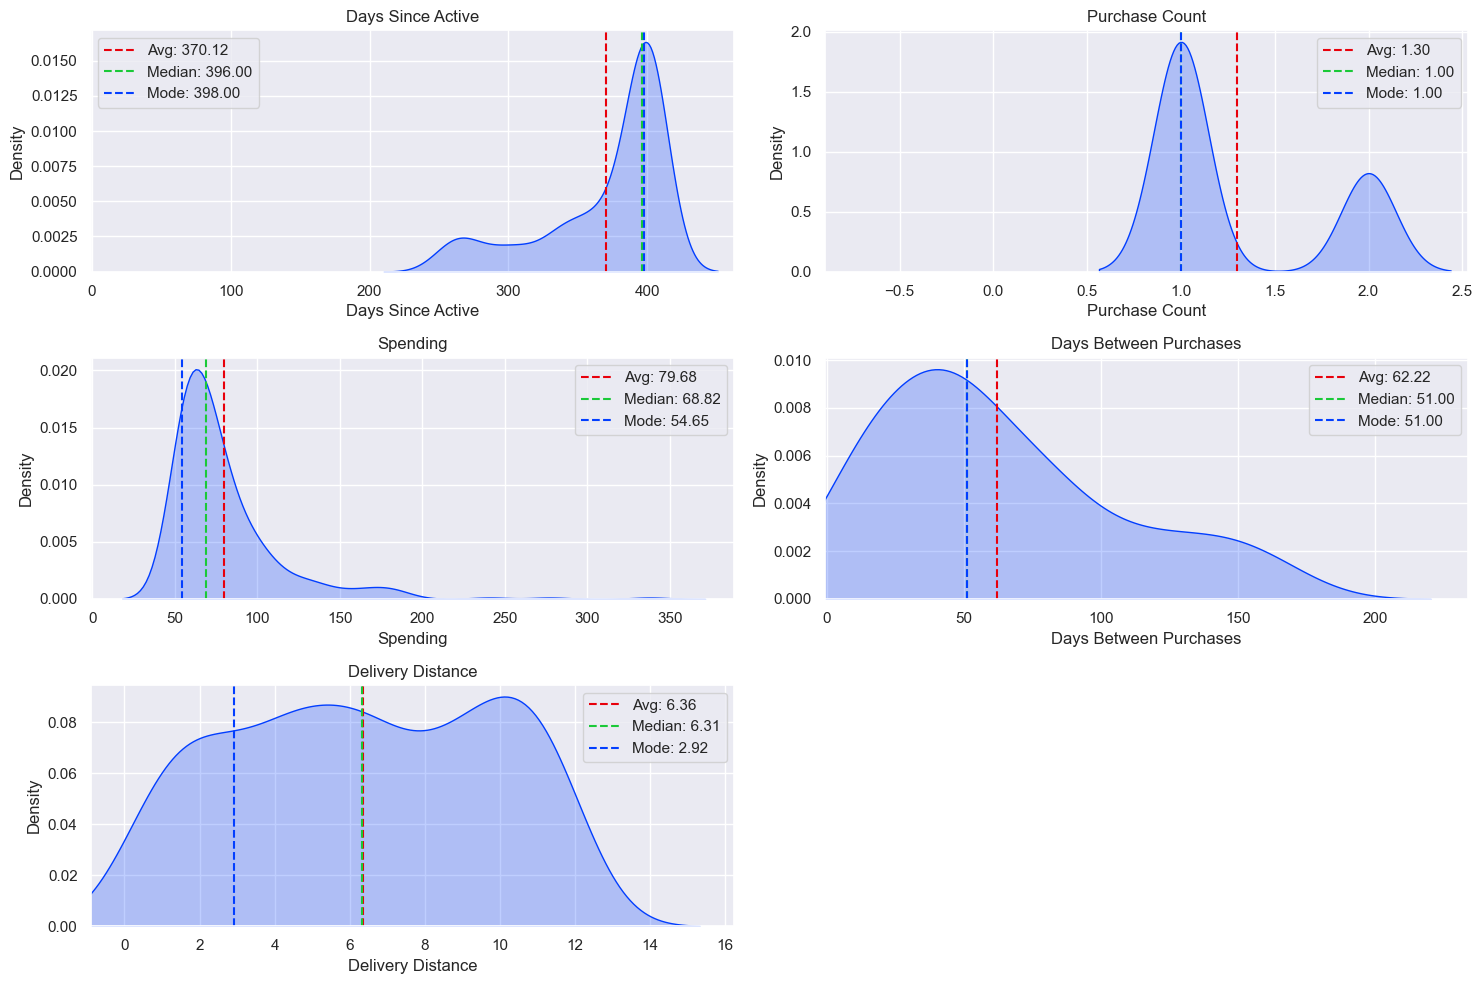

In [50]:
plot_rfm_distributions(rv,fv,mv, df_data)

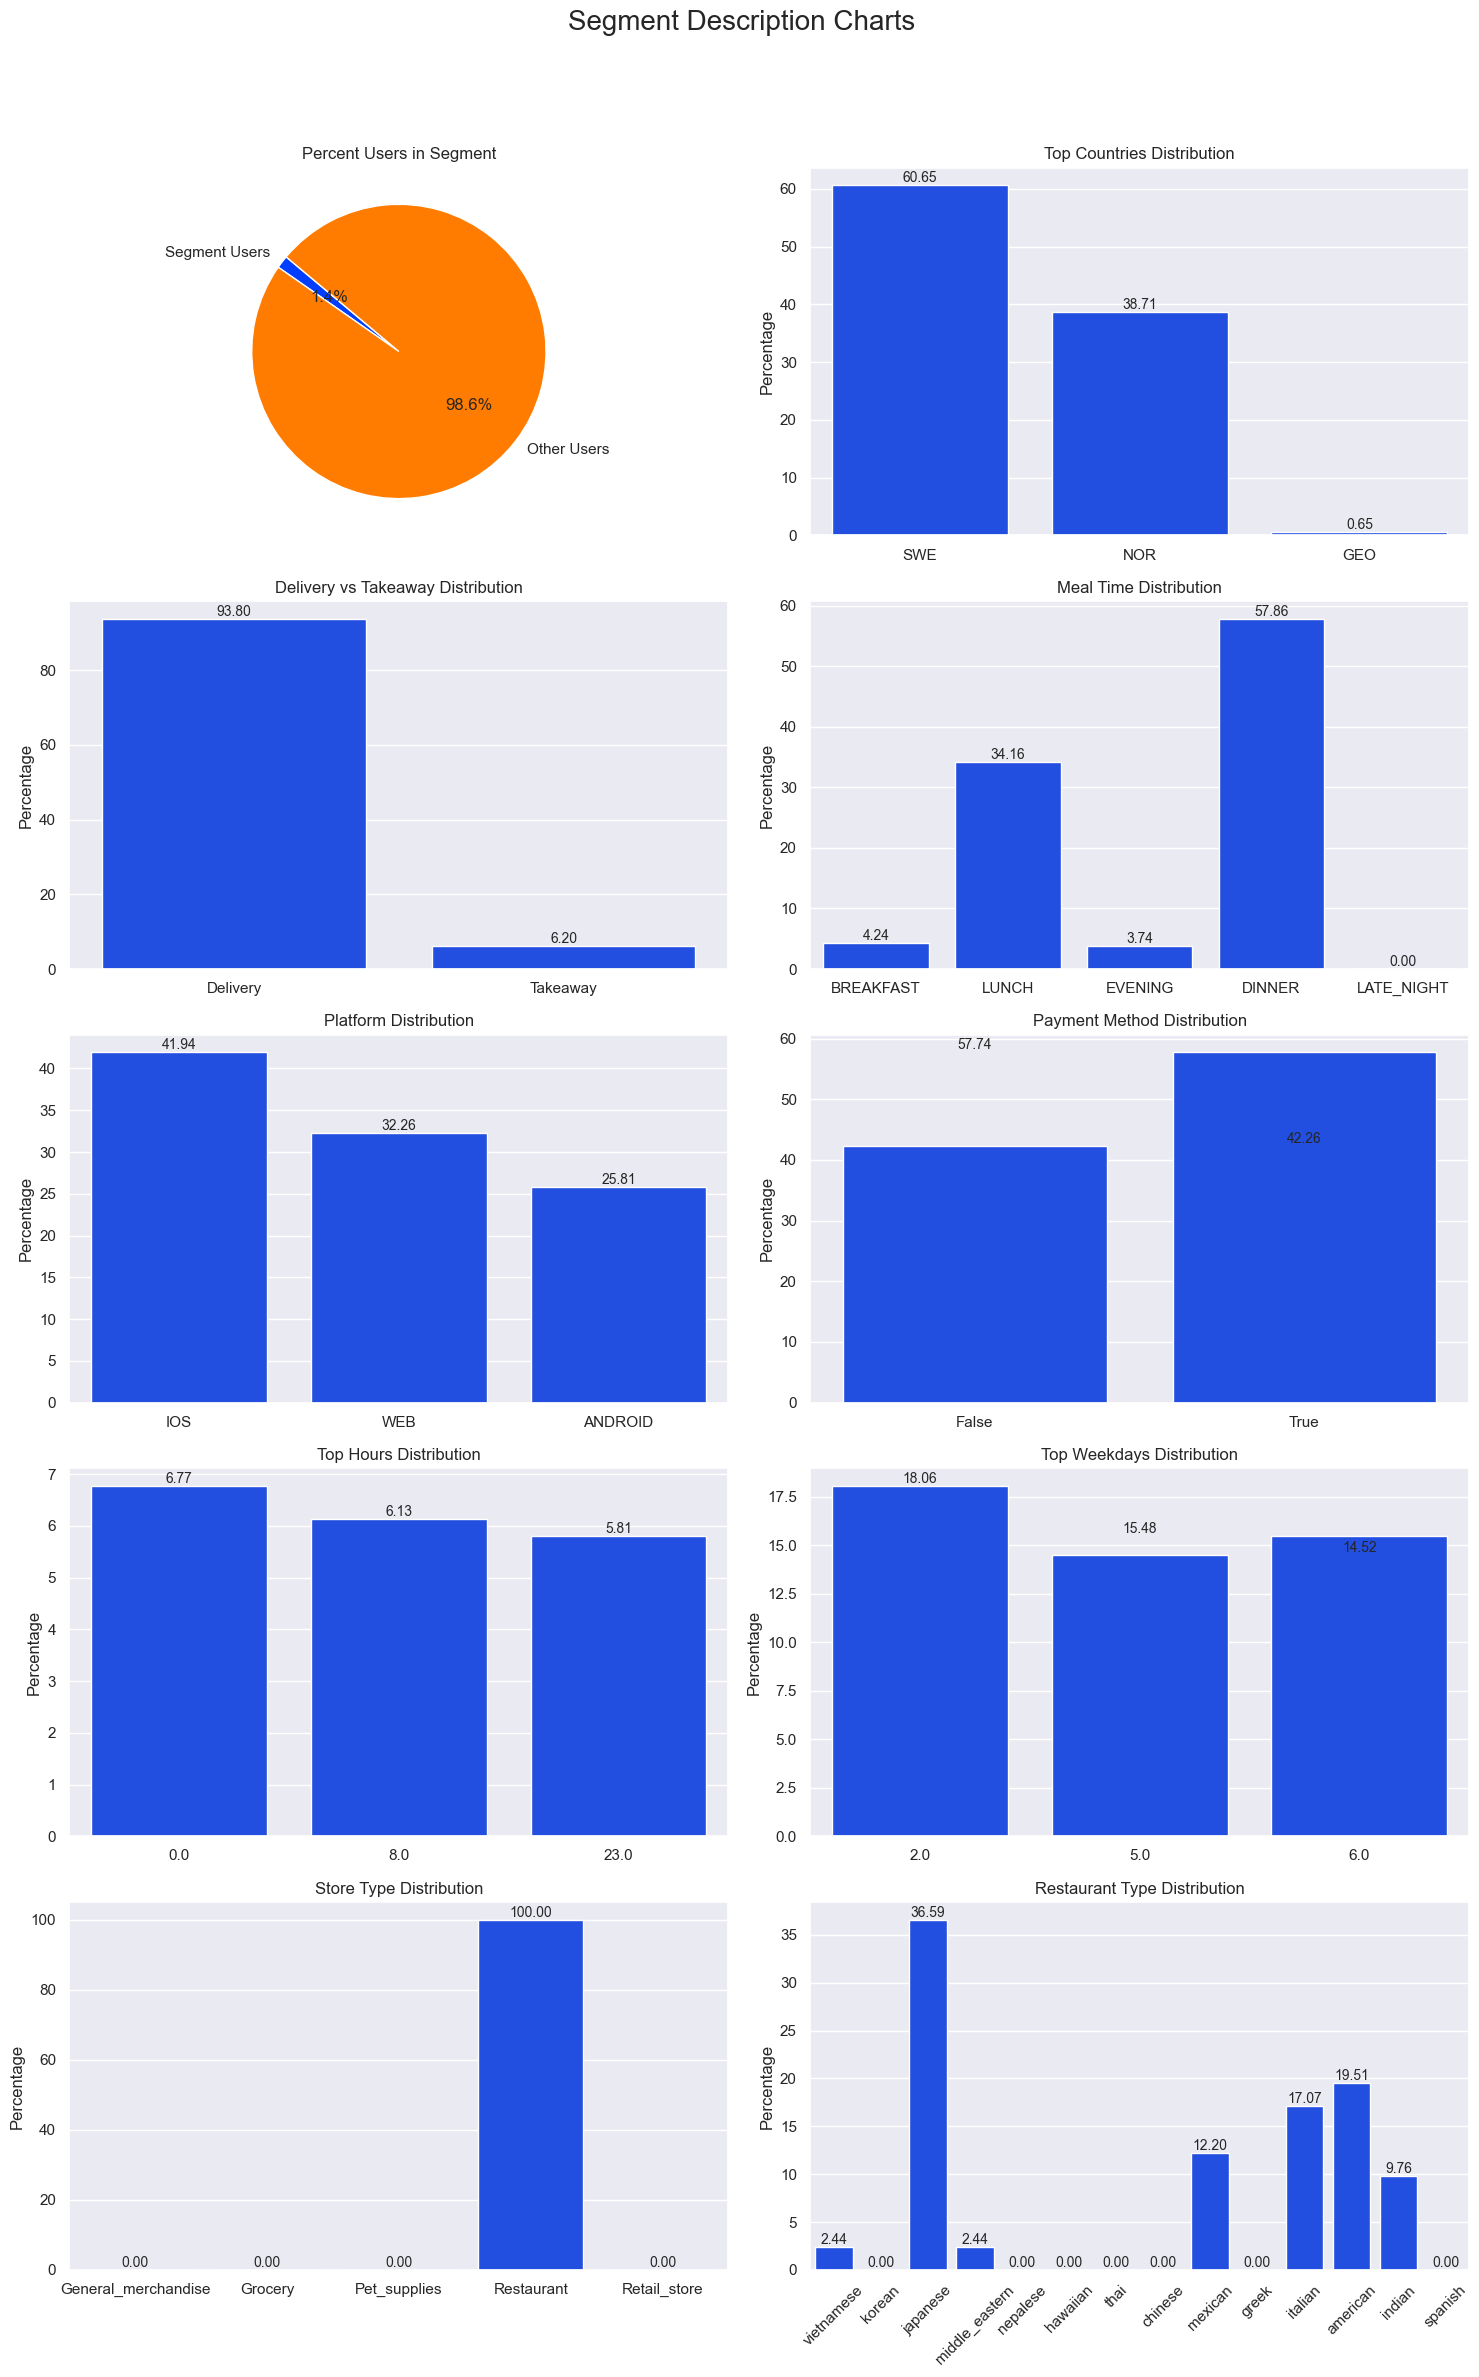

In [51]:
plot_segment_description(segment_description)

### **Hibernating (R1F3M3)**

Description: Frequent buyers with low recency and high spending.

Importance: They are on the verge of becoming inactive and need immediate reactivation efforts.

Recommendation: Send last-chance offers, personalized reactivation emails, and remind them of the value they used to find in your service.

In [52]:
rv,fv,mv = 1,3,3
segment_description = describe_rfm_segment(rv,fv,mv, df_data, marketing_strategies)
print_segment_description(segment_description)

Recommended Strategy:  Send reactivation emails with exclusive offers.

Segment Description:
Percent Users In Segment:
  - 0.20%
Top Countries Distribution:
  - SWE: 57.78%
  - NOR: 28.89%
  - GEO: 13.33%
Avg Days Since Active:
  - 413.02
Avg Purchase Count:
  - 10.31
Avg Spending:
  - 207.15
Delivery Takeaway Distribution:
  - Delivery: 99.35%
  - Takeaway: 0.65%
Meal Time Distribution:
  - BREAKFAST_PURCHASES: 8.62%
  - LUNCH_PURCHASES: 43.53%
  - EVENING_PURCHASES: 11.64%
  - DINNER_PURCHASES: 36.21%
  - LATE_NIGHT_PURCHASES: 0.00%
Platform Distribution:
  - IOS_PURCHASES: 15.73%
  - WEB_PURCHASES: 47.63%
  - ANDROID_PURCHASES: 36.64%
Payment Method Distribution:
  - True: 60.00%
  - False: 40.00%
Top Hours Distribution:
  - 18.0: 8.89%
  - 0.0: 6.67%
  - 2.0: 6.67%
Top Weekdays Distribution:
  - 4.0: 17.78%
  - 3.0: 17.78%
  - 2.0: 15.56%
Avg Days Between Purchases:
  - 9.36
Avg Delivery Distance:
  - 5.99
Store Type Distribution:
  - PURCHASED_IN_General_merchandise: 0.86%
  - PUR

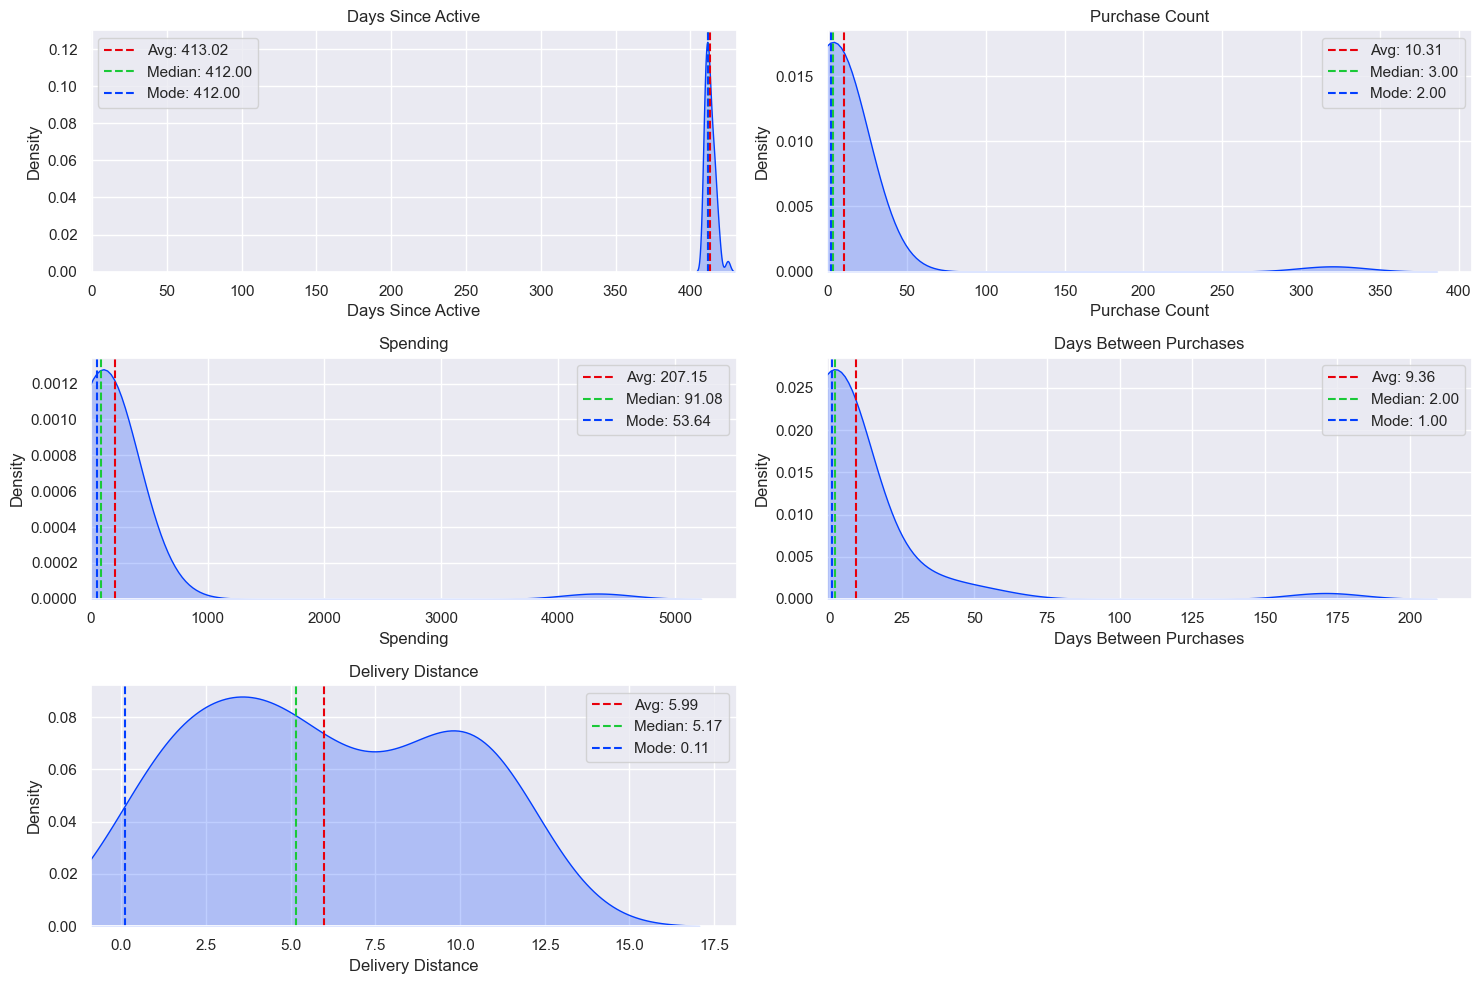

In [53]:
plot_rfm_distributions(rv,fv,mv, df_data)

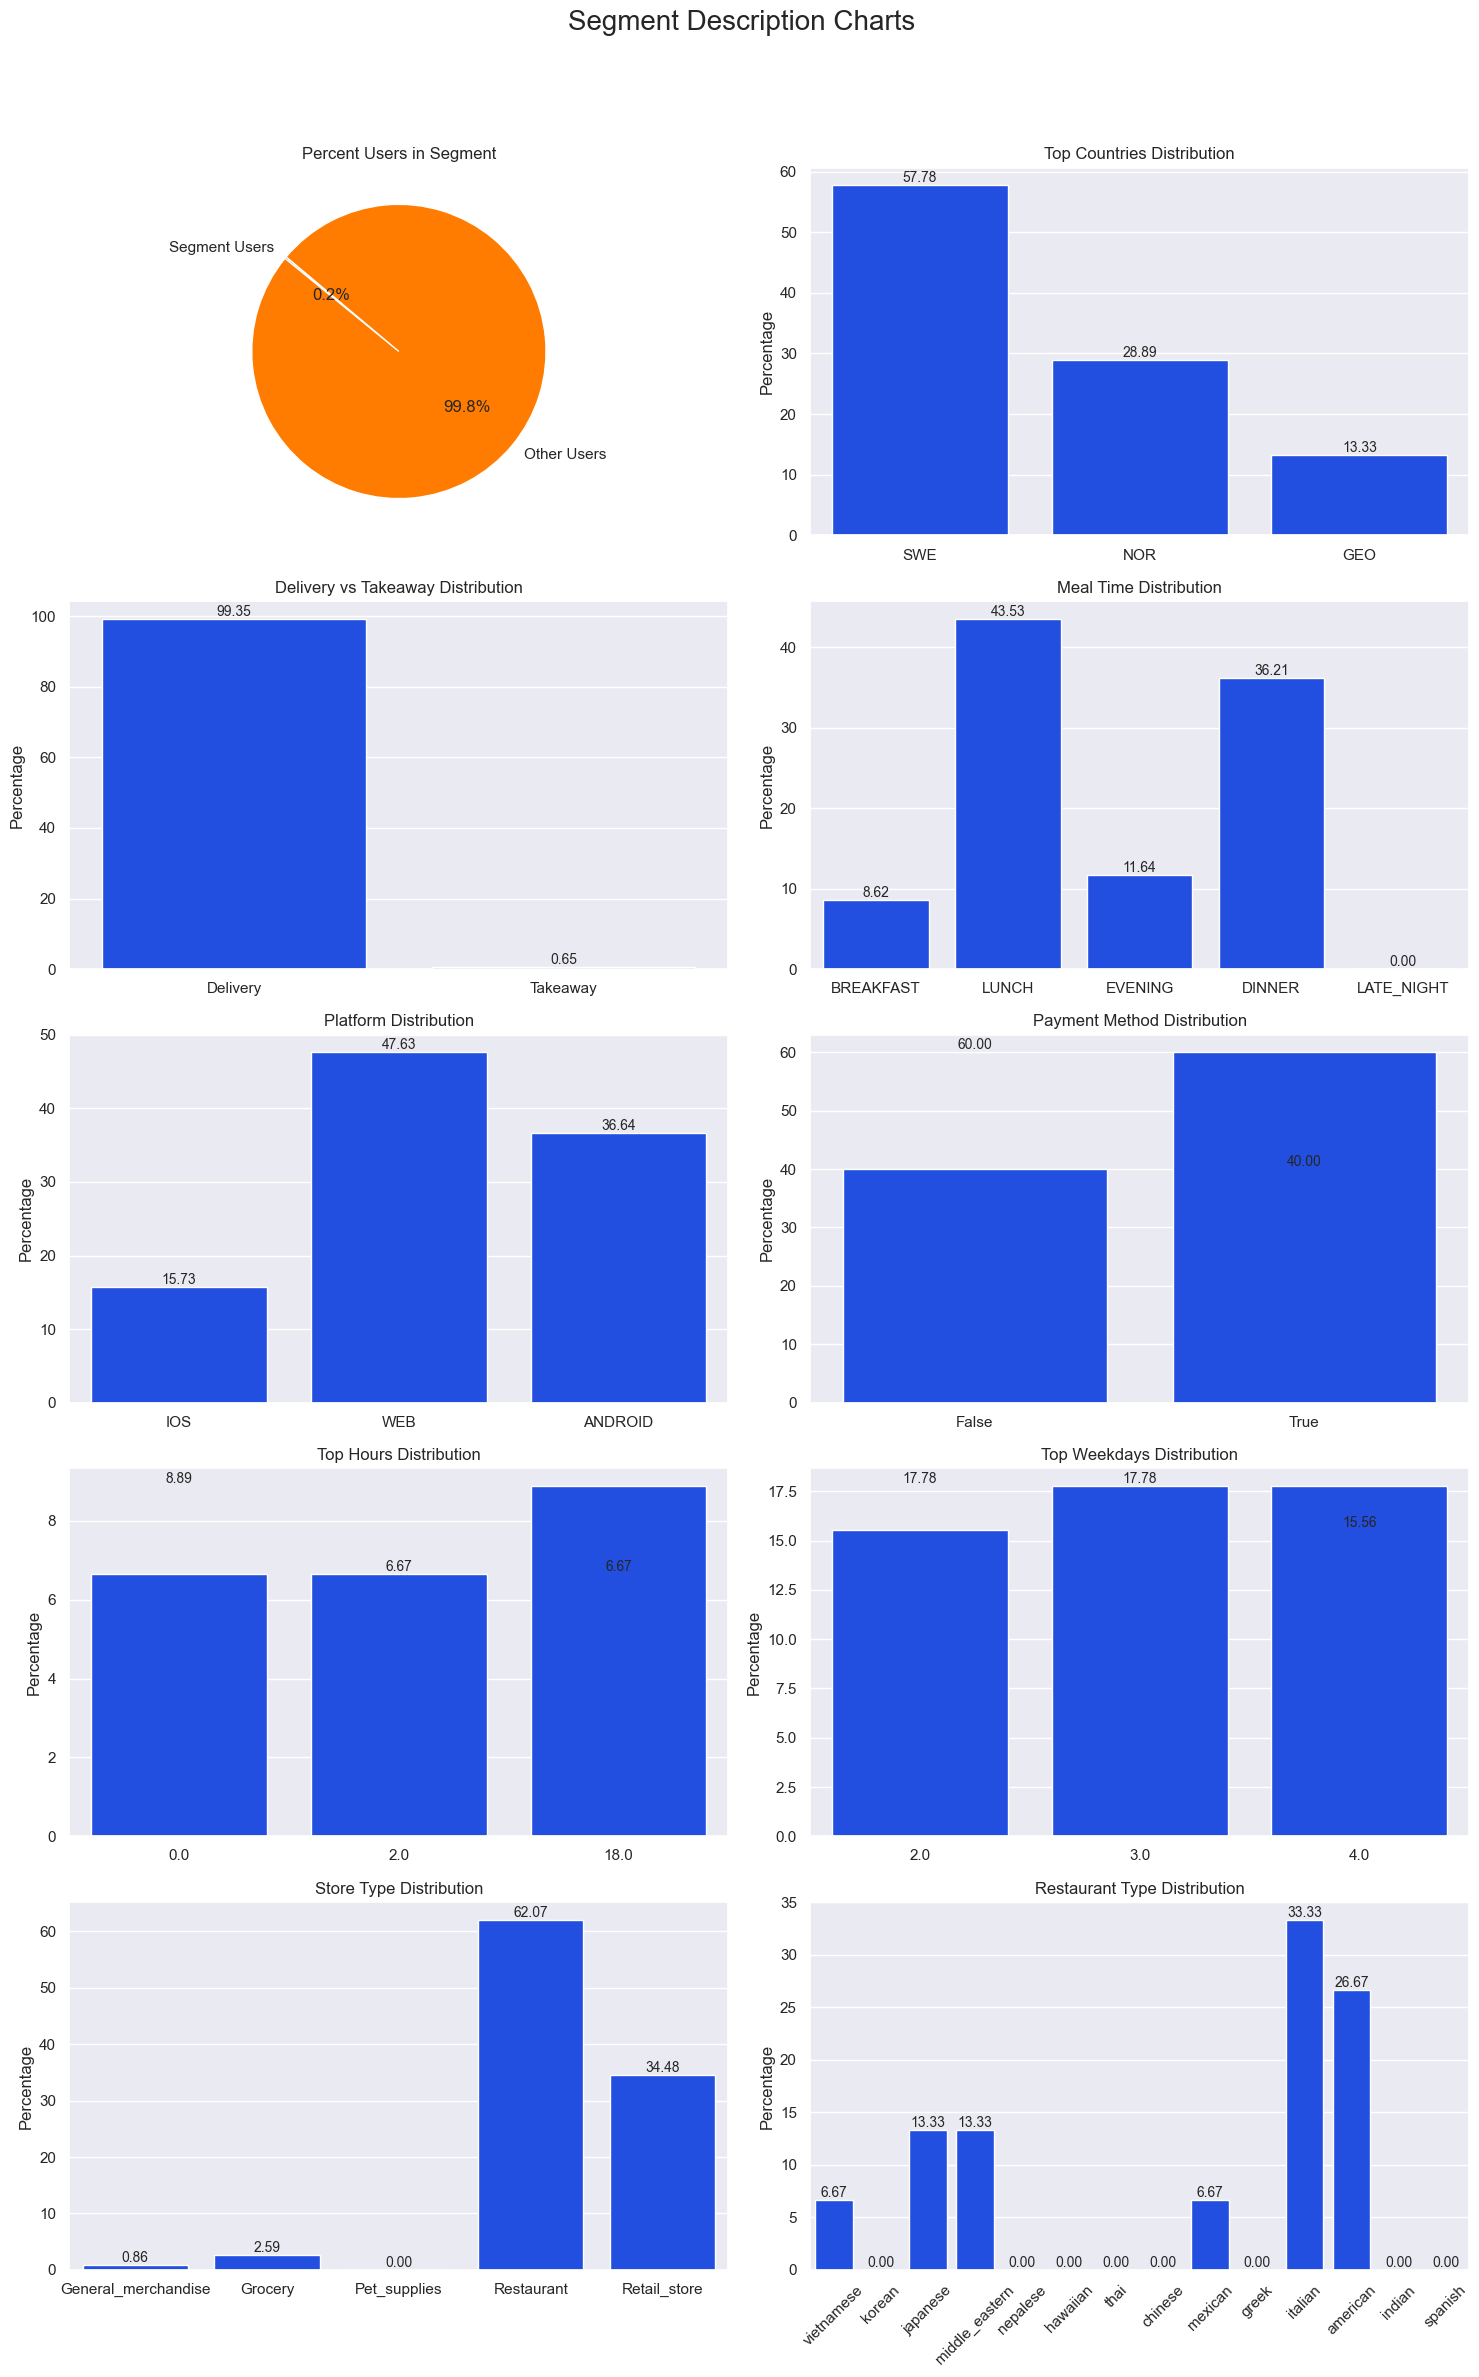

In [54]:
plot_segment_description(segment_description)

# 3. Interesting anomaly findings

C:\Users\d.pesegov\AppData\Local\Temp\ipykernel_31748\11965389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_data, x='PURCHASE_COUNT', y='PREFERRED_DEVICE', inner='box', palette='Dark2')


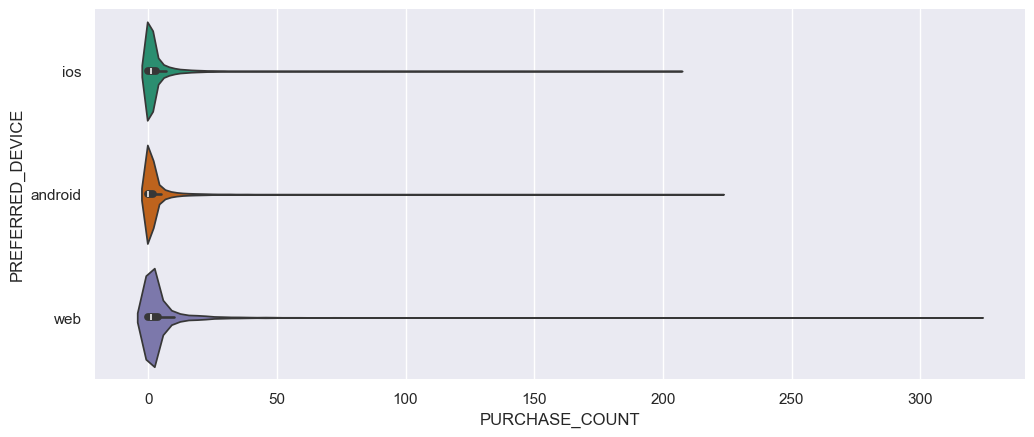

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_data['PREFERRED_DEVICE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_data, x='PURCHASE_COUNT', y='PREFERRED_DEVICE', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Abnormally large orders were placed via WEB.. Georgia?

In [41]:
df_data[df_data['USER_ID']==80].T

,79
REGISTRATION_DATE,2020-09-01 00:00:00
REGISTRATION_COUNTRY,GEO
PURCHASE_COUNT,320
PURCHASE_COUNT_DELIVERY,320.0
PURCHASE_COUNT_TAKEAWAY,0.0
FIRST_PURCHASE_DAY,2020-09-01 00:00:00
LAST_PURCHASE_DAY,NaT
USER_ID,80
BREAKFAST_PURCHASES,37.0
LUNCH_PURCHASES,171.0


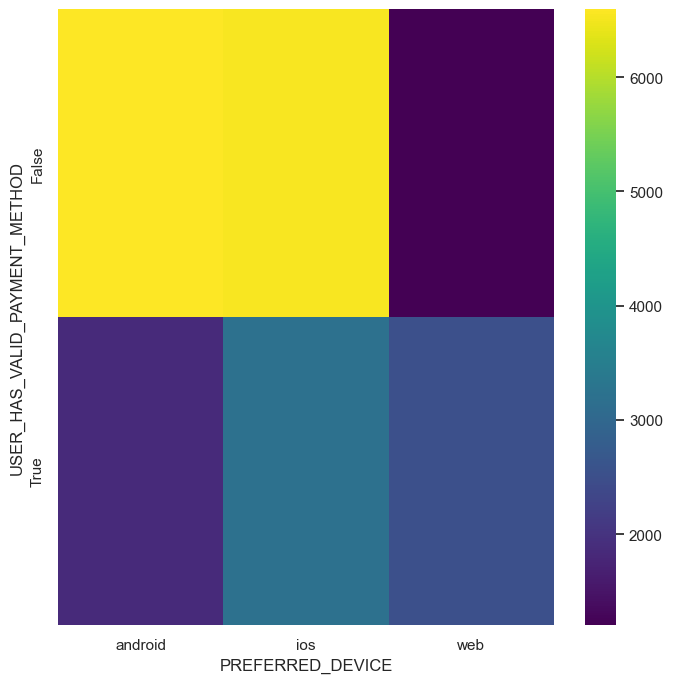

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['USER_HAS_VALID_PAYMENT_METHOD'].value_counts()
    for x_label, grp in df_data.groupby('PREFERRED_DEVICE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('PREFERRED_DEVICE')
_ = plt.ylabel('USER_HAS_VALID_PAYMENT_METHOD')

Most of problems with "no valid payment method" came from Android and IOS

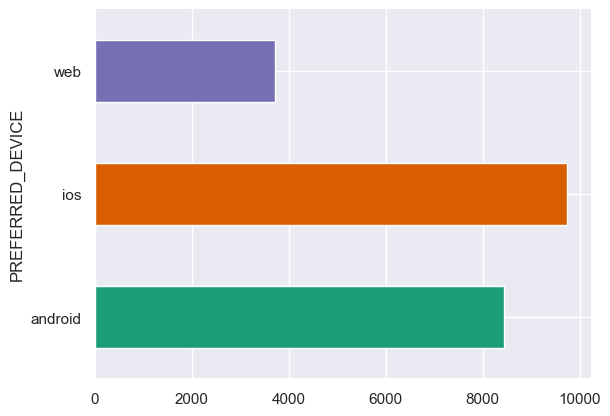

In [43]:
from matplotlib import pyplot as plt
import seaborn as sns
df_data.groupby('PREFERRED_DEVICE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

But they are the most popular platforms... would be great to fix it

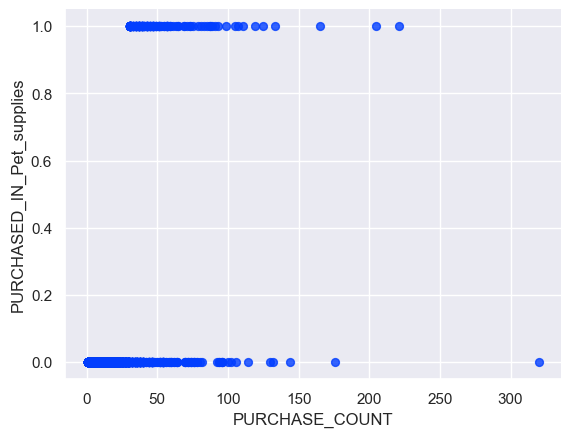

In [44]:
from matplotlib import pyplot as plt
df_data[df_data['PURCHASE_COUNT']>0].plot(kind='scatter', x='PURCHASE_COUNT', y='PURCHASED_IN_Pet_supplies', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Purchases from "pet suppliers" only happens in conjunction with something. Never by itself.